# Segmentação de Clientes e Programa de Fidelidade

Este projeto visa segmentar clientes de uma loja de varejo usando aprendizado não supervisionado (agrupamento) para otimizar um programa de fidelidade. O objetivo é entender melhor o perfil dos clientes, identificar um grupo ideal para o programa e, consequentemente, aumentar a receita dos dados.

**Problema de negócio:**  
A loja busca segmentar seus clientes para entender melhor suas preferências e comportamentos, adaptando produtos e criando um programa de fidelidade personalizado. O objetivo é fortalecer o relacionamento com os clientes, incentivando a recompra e aumentando a **receita**.

O modelo RFM será utilizado para categorizar os clientes com base em:

- **Recência:** Tempo desde a última compra.
- **Frequência:** Quantidade de compras.
- **Valor Monetário:** Valor total gasto em compras.

Com isso, será possível identificar segmentos como "alto valor e altamente engajado" ou "baixo valor e inativo", permitindo ações de marketing mais eficazes.

## Objetivos do projeto

- Identificar grupos de clientes, avaliando características comuns como preferências de produtos e dados demográficos.
- Criar um programa de fidelidade focado no grupo de clientes ideal, visando aumentar a retenção e a receita.
- Alcançar resultados financeiros positivos com a segmentação e o programa de fidelidade.

---

Em resumo, o projeto busca solucionar o problema de negócio através da segmentação de clientes e da implementação de um programa de fidelidade estratégico, baseado no modelo RFM.
 baseado no modelo RFM.


# 1. Importando Bibliotecas

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
from datetime import datetime

#EDA
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# Display options.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1200)

import warnings
warnings.filterwarnings('ignore')

from eda_utils import *



# Color Palette
instyle_palette = [ '#86786A','#C6C5A5','#D5BF86' , '#A71D31', '#3F0D12']

# 2. Carregando Dataset

In [2]:
path= r'input\marketing_campaign.csv'
customer = pd.read_csv(path, sep="\t")
customer.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


**Dicionário de Dados**

**Pessoas**

*   **ID:** Identificador único do cliente
*   **Year_Birth:** Ano de nascimento do cliente
*   **Education:** Nível de escolaridade do cliente
*   **Marital_Status:** Estado civil do cliente
*   **Income:** Renda familiar anual do cliente
*   **Kidhome:** Número de crianças na casa do cliente
*   **Teenhome:** Número de adolescentes na casa do cliente
*   **Dt_Customer:** Data de inscrição do cliente na empresa
*   **Recency:** Número de dias desde a última compra do cliente
*   **Complain:** 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário

**Produtos**

*   **MntWines:** Valor gasto com vinhos nos últimos 2 anos
*   **MntFruits:** Valor gasto com frutas nos últimos 2 anos
*   **MntMeatProducts:** Valor gasto com carne nos últimos 2 anos
*   **MntFishProducts:** Valor gasto com peixe nos últimos 2 anos
*   **MntSweetProducts:** Valor gasto com doces nos últimos 2 anos
*   **MntGoldProds:** Valor gasto com ouro nos últimos 2 anos

**Promoção**

*   **NumDealsPurchases:** Número de compras feitas com desconto
*   **AcceptedCmp1:** 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
*   **AcceptedCmp2:** 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
*   **AcceptedCmp3:** 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
*   **AcceptedCmp4:** 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
*   **AcceptedCmp5:** 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
*   **Response:** 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

**Local**

*   **NumWebPurchases:** Número de compras feitas através do site da empresa
*   **NumCatalogPurchases:** Número de compras feitas usando um catálogo
*   **NumStorePurchases:** Número de compras feitas diretamente nas lojas
*   **NumWebVisitsMonth:** Número de visitas ao site da empresa no último mêsto company’s website in the last month

<Axes: >

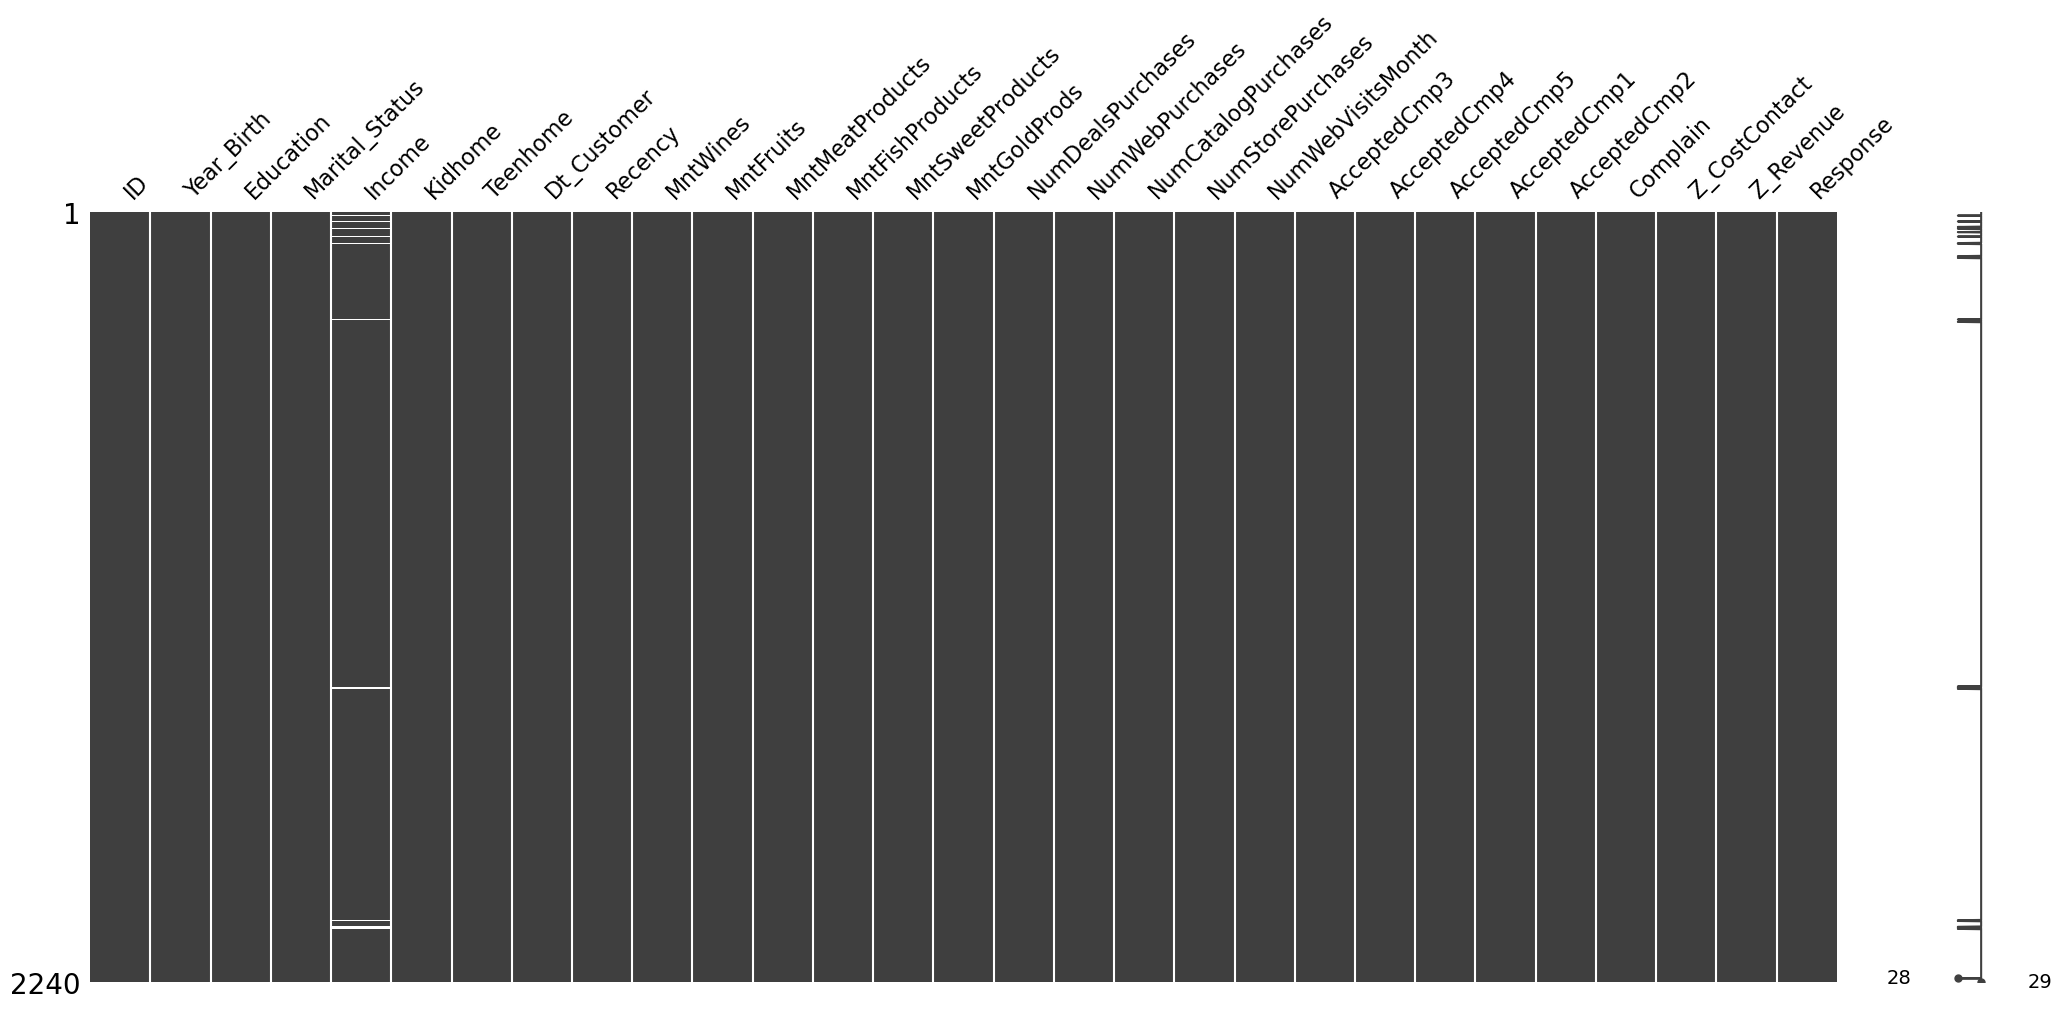

In [3]:
msno.matrix(customer)

In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ID                   int64  
 1   Year_Birth           int64  
 2   Education            object 
 3   Marital_Status       object 
 4   Income               float64
 5   Kidhome              int64  
 6   Teenhome             int64  
 7   Dt_Customer          object 
 8   Recency              int64  
 9   MntWines             int64  
 10  MntFruits            int64  
 11  MntMeatProducts      int64  
 12  MntFishProducts      int64  
 13  MntSweetProducts     int64  
 14  MntGoldProds         int64  
 15  NumDealsPurchases    int64  
 16  NumWebPurchases      int64  
 17  NumCatalogPurchases  int64  
 18  NumStorePurchases    int64  
 19  NumWebVisitsMonth    int64  
 20  AcceptedCmp3         int64  
 21  AcceptedCmp4         int64  
 22  AcceptedCmp5         int64  
 23  AcceptedCmp1         int64  
 24  Acce

In [5]:
customer.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
customer.duplicated().sum()

0

In [7]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**Insights:**

1. **Idade:** A média de Idade dos nossos Clientes é 56 Anos, a idade minima é (1893) que representaria uma pessoa com 131 anos.
2. **Renda:** A Renda média é de 52247.251, no desvio padrão conseguimos notar uma grande dispersão nos dados e possivéis outliers.
3. **Filhos:** Analisando KindHome e TeenHome notamos que a média de 0.44 e 0.50 Notamos que a maioria dos nossos clientes não possuem filhos.
4. **Recência:** Em média, os clientes fizeram sua última compra há cerca de 49 dias, com alguns clientes com 0 dias e outros há quase 100.
5. **Reclamações:** A taxa de reclamação é baixa com uma média de 0.009, indicando que os clientes não realizam tantas reclamações.
6. **Produtos:** Os gastos com vinho representam o maior gasto com média de (303), seguido por Carnes, Frutas, Peixes...
7. **Canais:** Compra na Loja e Online são as preferidas de nossos clientes, seguida por compras via Catálogo.
8. **VisitasOnline:** Os Clientes visitam o site da empresa em média de 5 vezes por mês.
9. **Campanhas:** No geral a taxa de aceitação de campanhas é bem baixa, indicando uma possível ineficiencia das campanhas de Marketing. 

---

Nessa Etapa estou alterando o nome das colunas para um melhor entendimento e excluindo colunas que seram irrelevantes para essa Análise.


In [8]:
customer=customer.rename(columns={"MntWines": "Wines",
                                 "MntFruits":"Fruits",
                                 "MntMeatProducts":"Meat",
                                 "MntFishProducts":"Fish",
                                 "MntSweetProducts":"Sweets",
                                 "MntGoldProds":"Gold"})

customer.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID'], inplace=True)

customer.columns = [x.lower() for x in customer.columns]

In [9]:
customer['dt_customer'] = pd.to_datetime(customer['dt_customer'], format='%d-%m-%Y')

# 2. Análise Exploratória de Dados (EDA) 


In [10]:
numerical_features = customer.select_dtypes('number').columns.tolist()
categorical_features = customer.select_dtypes('object').columns.tolist()

## Categorical Features

In [11]:
for feature in categorical_features:
    describe_categorical(customer, feature)

education
----------------------------------------
Unique values: 5
Value counts:
- Graduation: 50.31%
- PhD: 21.70%
- Master: 16.52%
- 2n Cycle: 9.06%
- Basic: 2.41%

marital_status
----------------------------------------
Unique values: 8
Value counts:
- Married: 38.57%
- Together: 25.89%
- Single: 21.43%
- Divorced: 10.36%
- Widow: 3.44%
- Alone: 0.13%
- Absurd: 0.09%
- YOLO: 0.09%



## Numerical Features

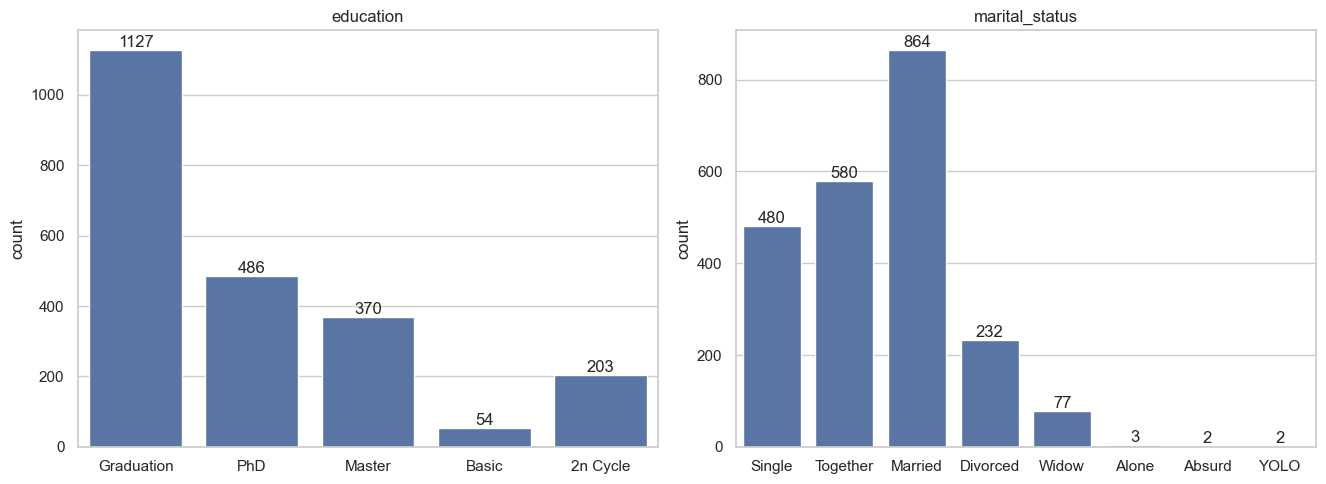

In [12]:
sns_plots(data=customer, features=categorical_features, plot_type='count')

Notamos que marital_status possui alguns valores não convencionais, esse valores podem ser removidos ou adicionados a Alone.
A maior parte dos nossos clientes possui nivel superior.

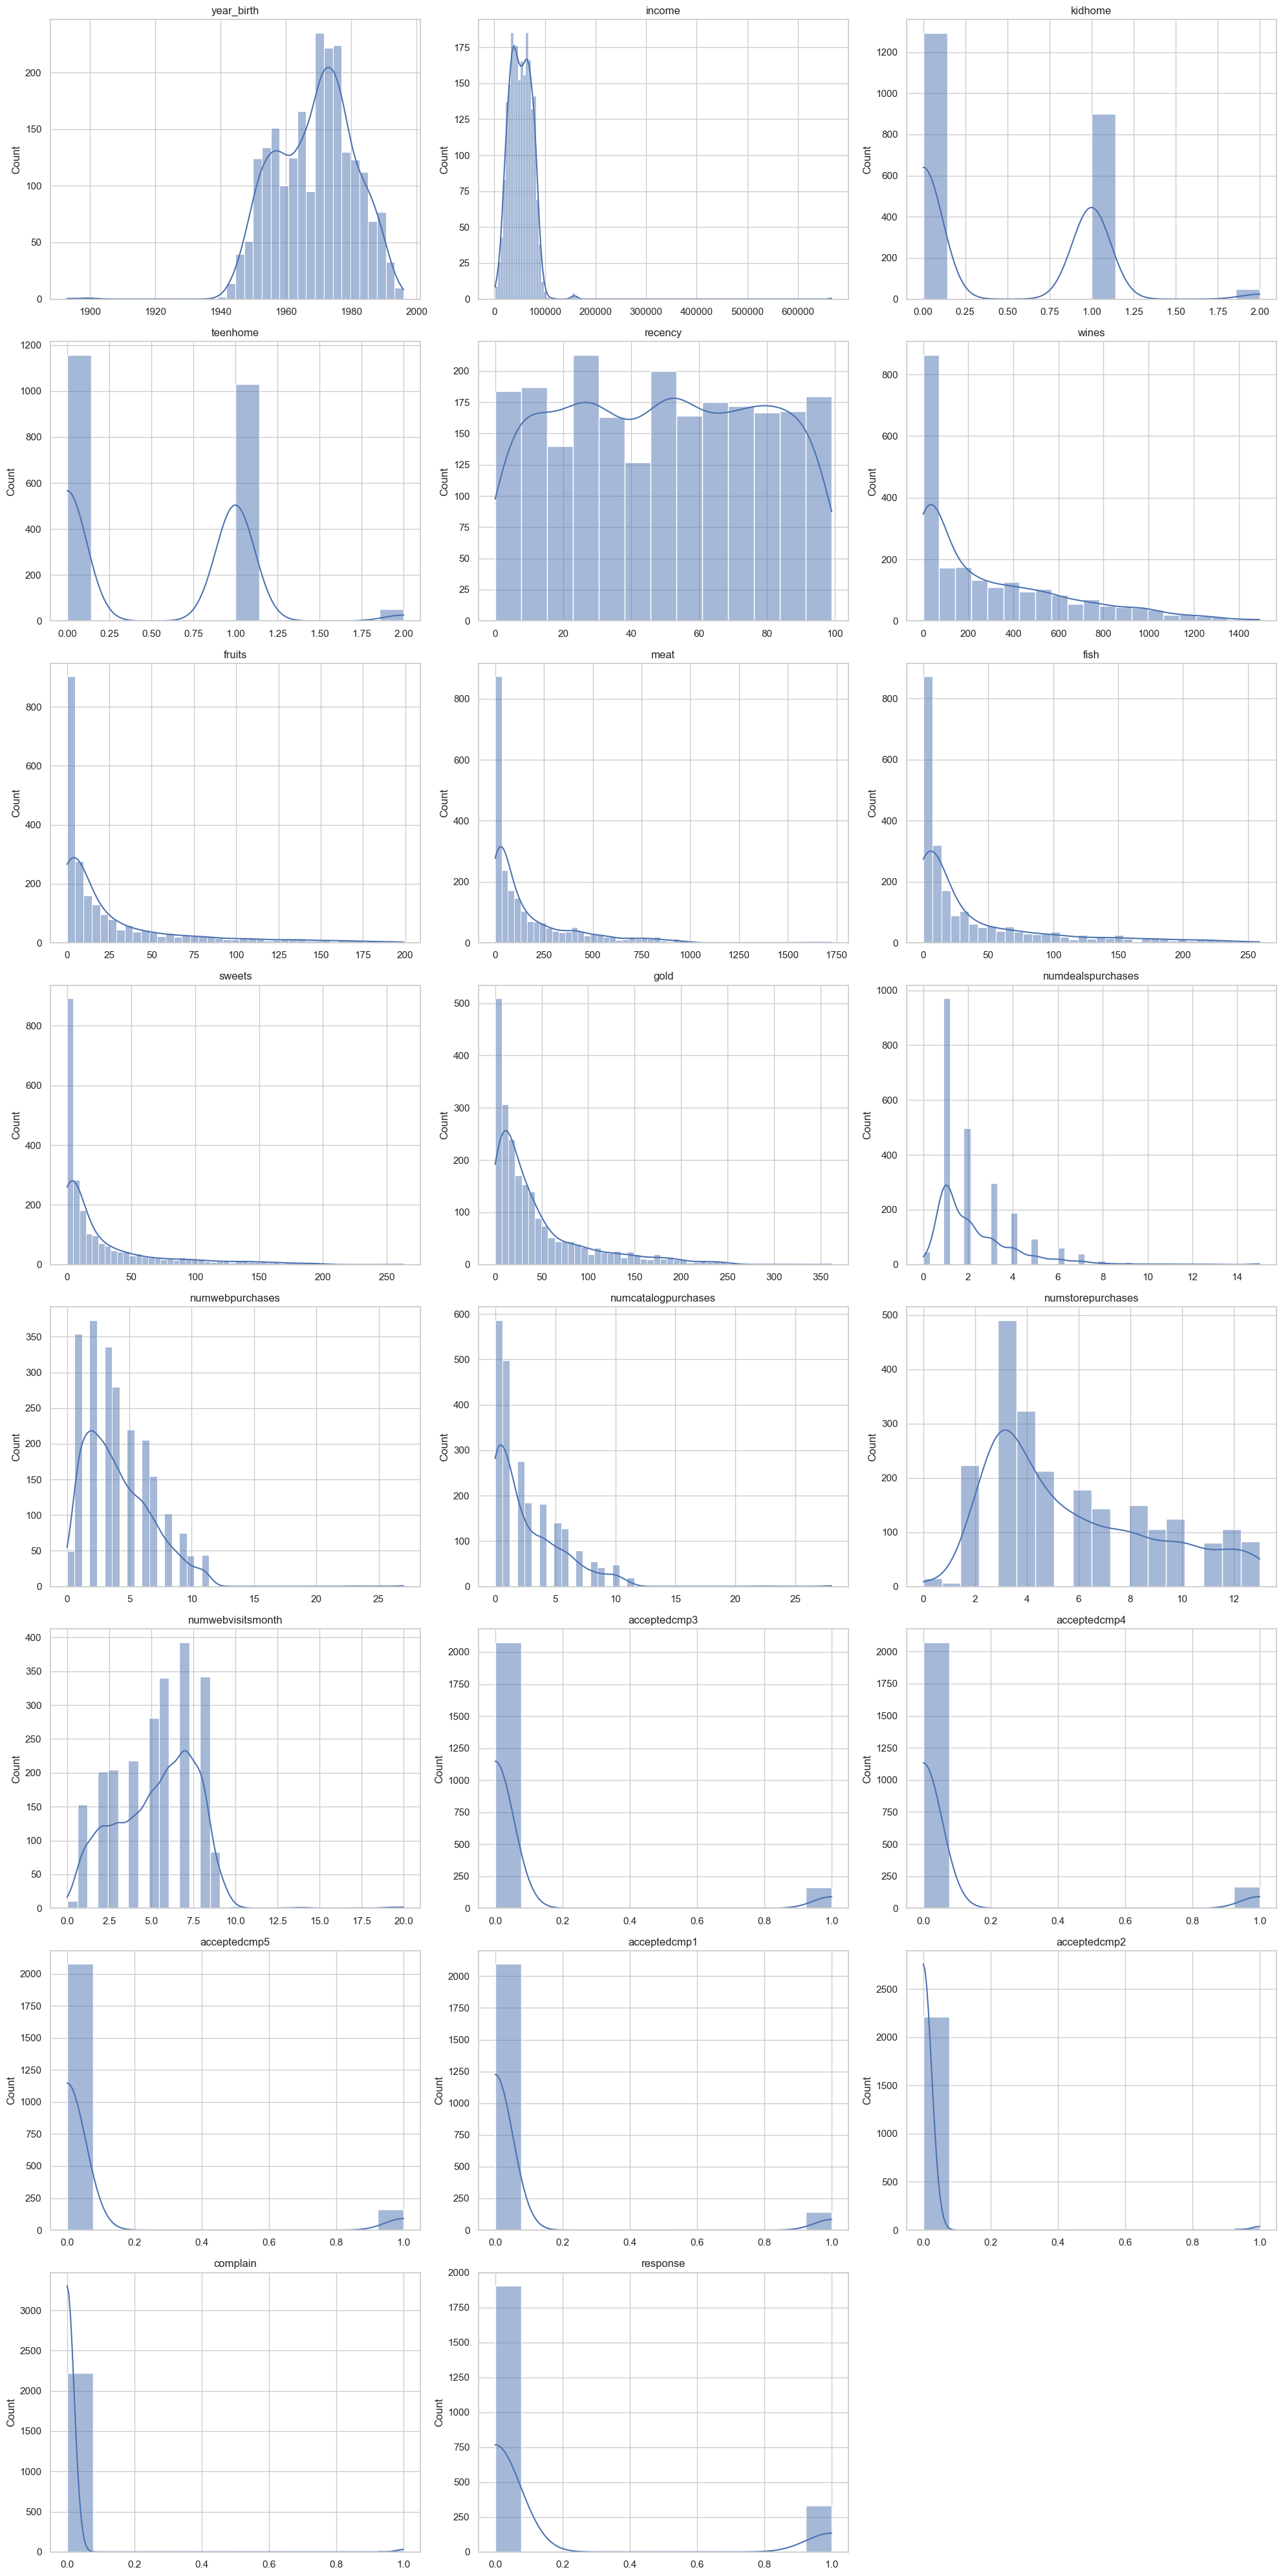

In [13]:
sns_plots(data=customer, features=numerical_features, plot_type='hist', kde=True)

In [14]:
outlier_analysis,index_outlier = analyze_outliers(customer, numerical_features)
outlier_analysis

,feature,quantidade_outliers,porcentagem_outliers,limite_inferior,limite_superior,Q1,Q3,IQR
0,year_birth,3,0.13,1932.0,2004.0,1959.00,1977.00,18.0
1,income,8,0.36,-14525.5,118350.5,35303.00,68522.00,33219.0
2,kidhome,0,0.00,-1.5,2.5,0.00,1.00,1.0
3,teenhome,0,0.00,-1.5,2.5,0.00,1.00,1.0
4,recency,0,0.00,-51.0,149.0,24.00,74.00,50.0
5,wines,35,1.56,-697.0,1225.0,23.75,504.25,480.5
6,fruits,227,10.13,-47.0,81.0,1.00,33.00,32.0
7,meat,175,7.81,-308.0,556.0,16.00,232.00,216.0
8,fish,223,9.96,-67.5,120.5,3.00,50.00,47.0
9,sweets,248,11.07,-47.0,81.0,1.00,33.00,32.0


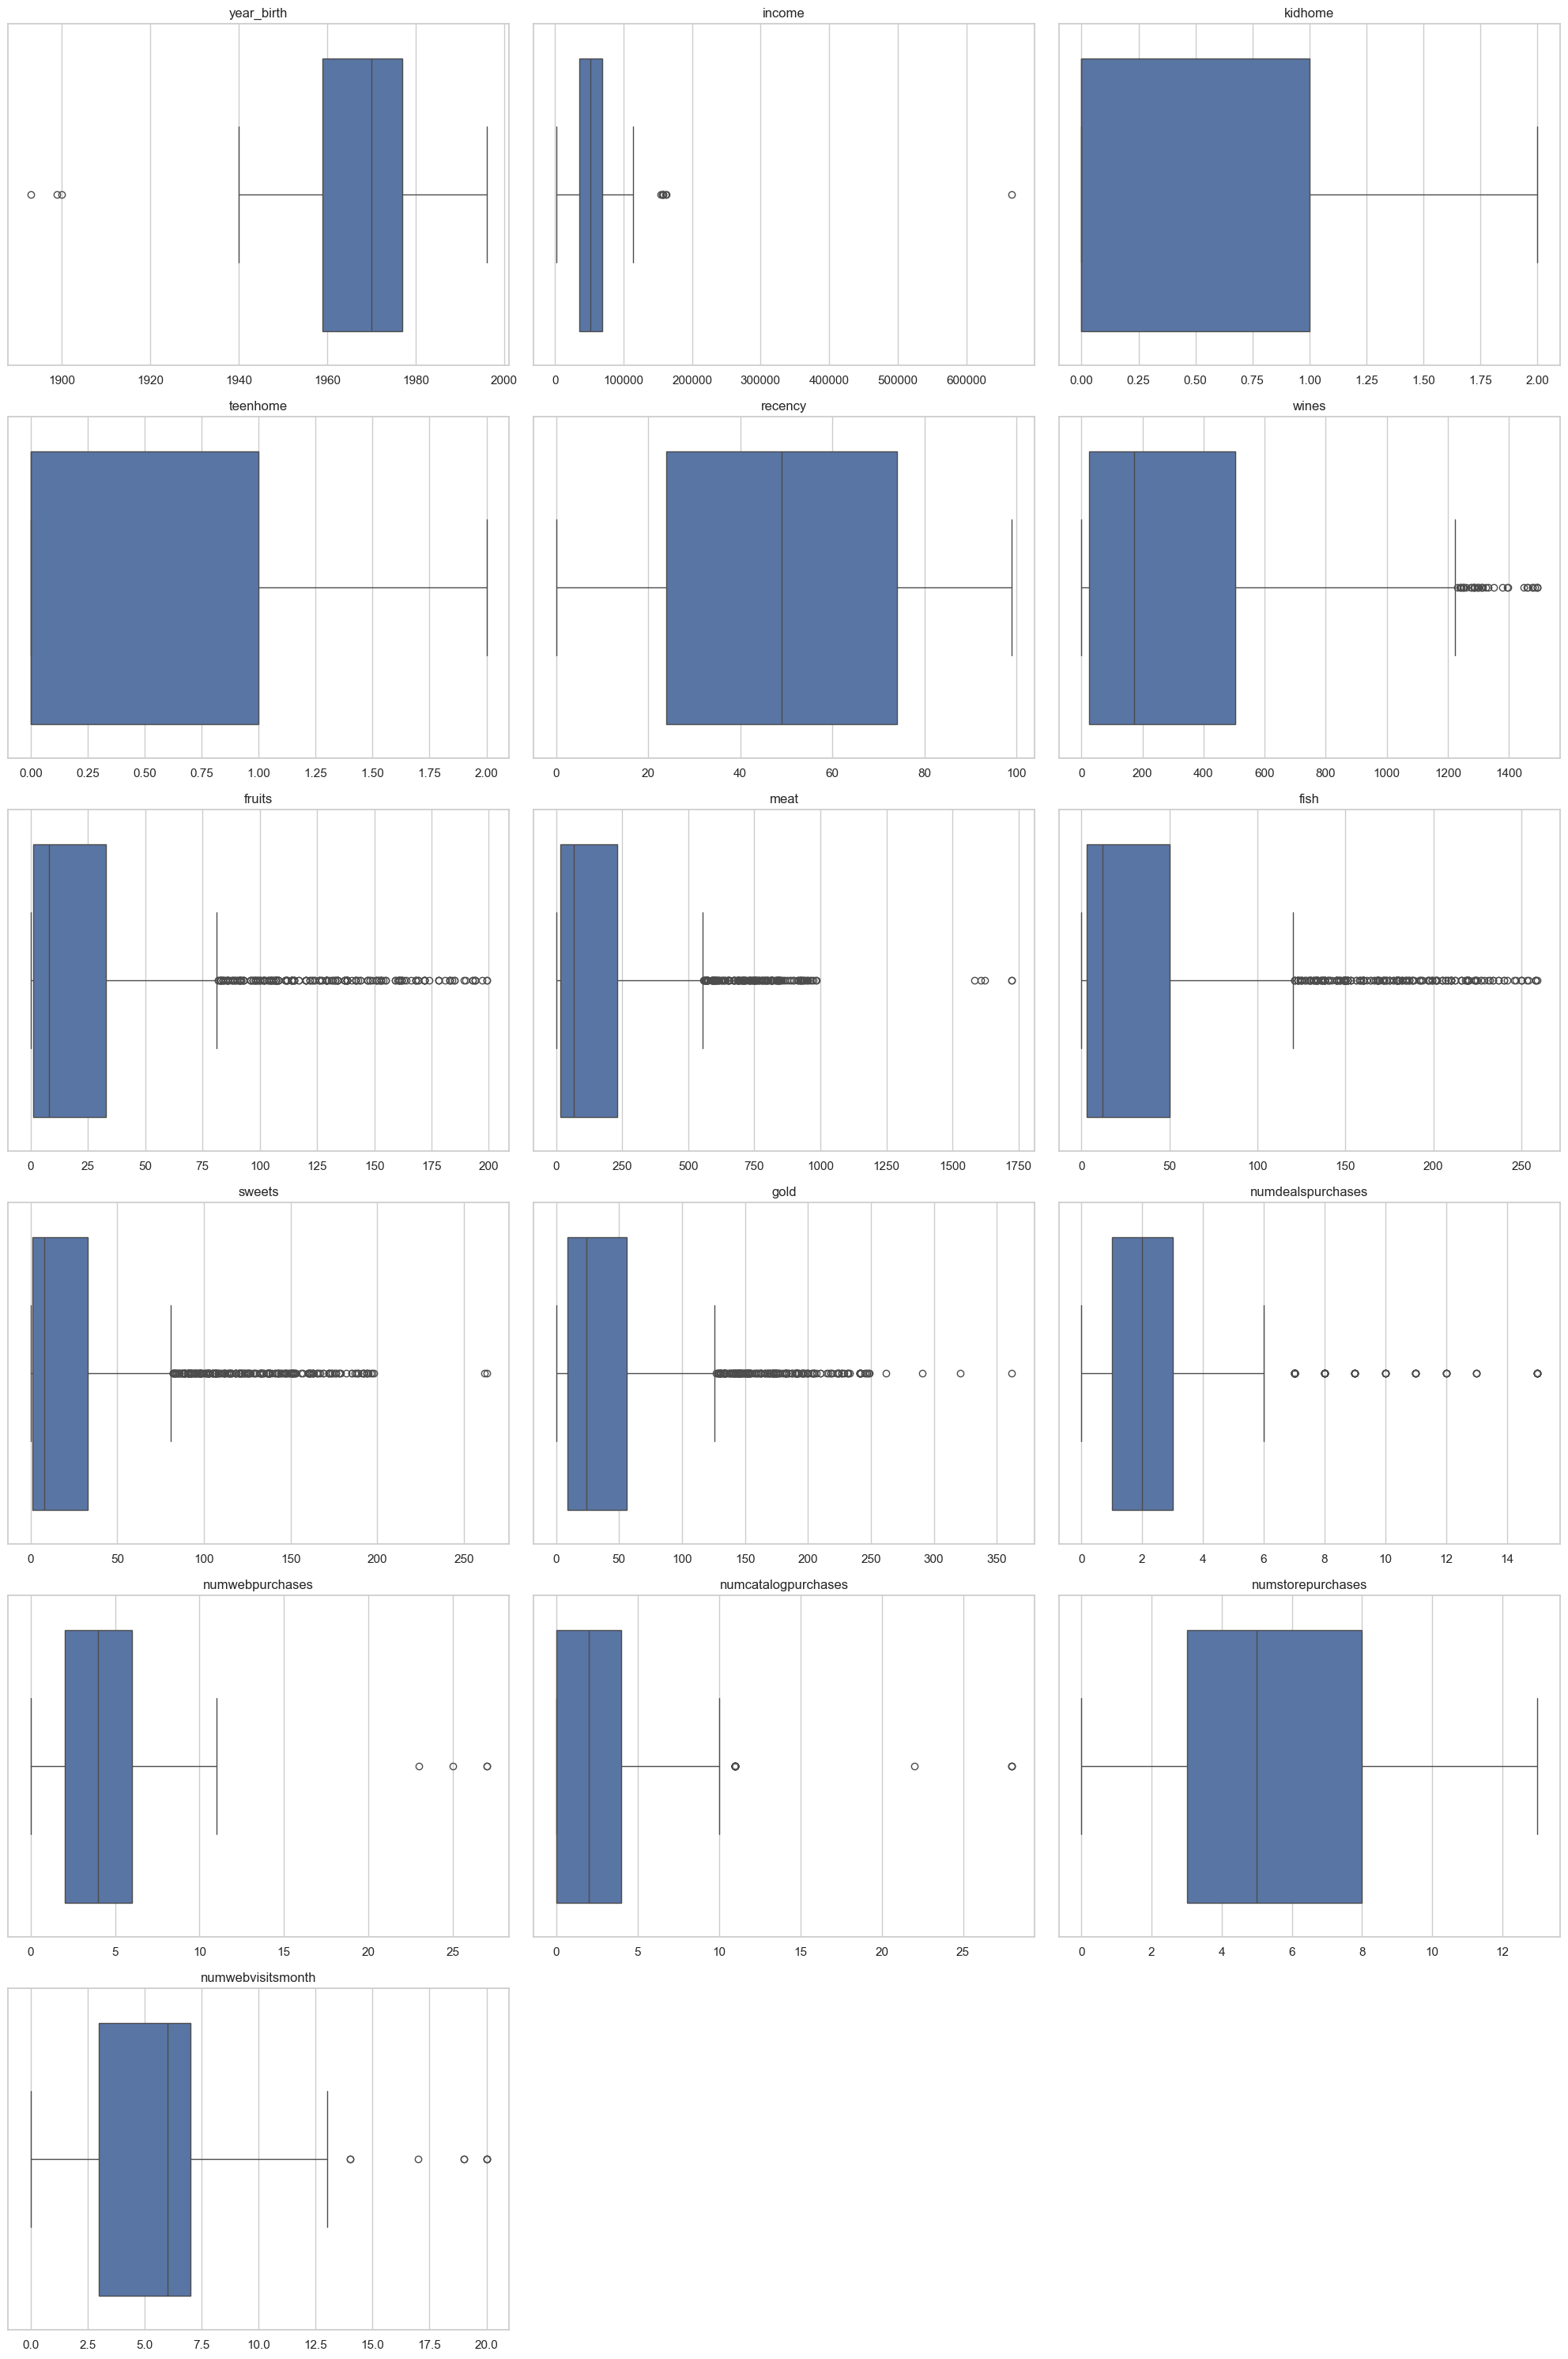

In [15]:
outlier_plot = ['year_birth',
                 'income',
                 'kidhome',
                 'teenhome',
                 'recency',
                 'wines',
                 'fruits',
                 'meat',
                 'fish',
                 'sweets',
                 'gold',
                 'numdealspurchases',
                 'numwebpurchases',
                 'numcatalogpurchases',
                 'numstorepurchases',
                 'numwebvisitsmonth',]

sns_plots(data=customer, features=outlier_plot, plot_type='outliers')

In [16]:
drop_index = index_outlier['income'] + index_outlier['year_birth']
customer.drop(drop_index, inplace=True)

Como esperado, as variáveis que representam o valor gasto em diferentes tipos de produtos (como vinhos, frutas, carne, etc.) apresentam uma quantidade significativa de outliers. No entanto, é natural que alguns clientes gastem mais do que outros, refletindo diferentes perfis de consumo. A remoção de outliers distorceria a representação da diversidade de consumo, o que poderia atrapalhar o  modelo a generalizar padrões de gastos semelhantes. Portanto, esses outliers não serão removidos, pois não representam inconsistencias nos dados, mas sim a variabilidade inerente ao comportamento do consumidor.

Por outro lado, variáveis como  'ano de nascimento' e 'renda' apresentam um número reduzido de outliers, porem com valores discrepantes em relação à distribuição geral. Observamos clientes com ano de nascimento anterior a 1900, o que é improvável e sugere possíveis erros de entrada de dados. Adicionalmente, identificamos um cliente com renda superior a US$ 600.000, um valor extremamente alto que pode ser um erro ou representar um caso muito específico que não se encaixa no perfil da maioria dos clientes. Essas observações podem representar informações inconsistentes ou erros de digitação, e sua presença pode influenciar negativamente o nosso modelo.

A aplicação de técnicas de redução de dimensionalidade, como PCA (Análise de Componentes Principais) ou t-SNE (t-distributed Stochastic Neighbor Embedding), antes da modelagem pode ajudar a mitigar ainda mais o impacto de possíveis anomalias remanescentes, ao projetar os dados em um espaço de menor dimensão, sobre a influência de outliers individuais é reduzida.

In [17]:
corr_matrix = customer.corr(numeric_only=True)

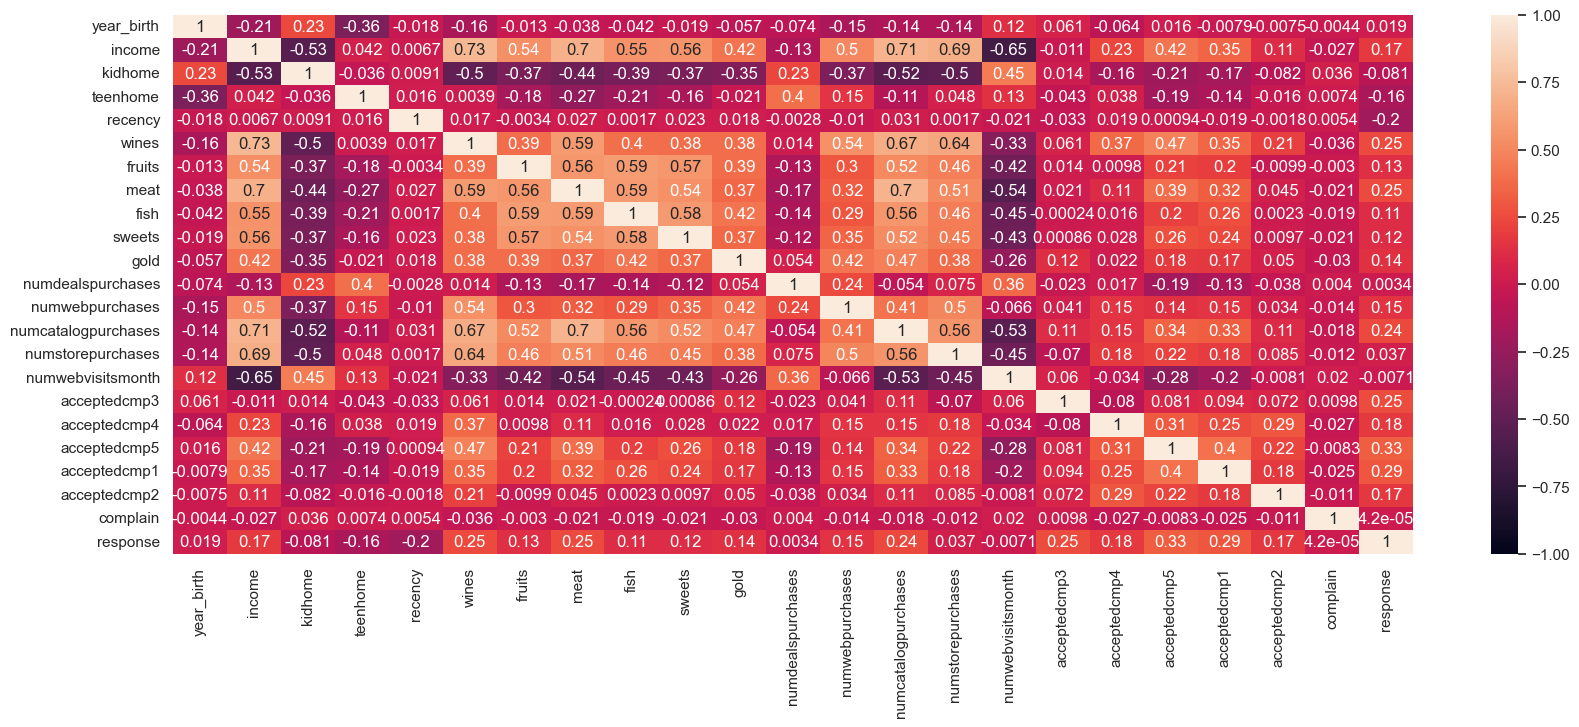

In [18]:
plt.figure(figsize=(20, 7))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

Insights:

- Clientes com maior renda tendem a gastar mais em produtos como vinho e carne, além de preferirem compras em catálogo e lojas.
- Clientes que gastam muito em vinho também tendem a gastar bastante em carne.
- Famílias com mais filhos gastam menos em produtos premium, como vinho e carne, e têm menos compras por catálogo.
- Clientes com maior renda tendem a ter menos ou nenhum filho.
- Renda e Compras no Catálogo estão fortemente correlacionados indicando que pessoas com maior renda constumam optar por esse canal.
- Renda Possui uma correlação negativa com webvisits, mostrando que as pessoas de maior renda optam por canais como loja e catálogo.
- Notamos que familias com adolescentes tendem a comprar mais com desconto.
- Familias com crianças tendem a fazer mais visitas ao site.
- webvisits possui uma correlação negativa com quase todos os produtos oferecidos, alem de possuir uma correlação moderada com compras com desconto

# Feature Enginnering

In [19]:
customer['education'] = customer['education'].map({'Graduation':'Graduate',
                                                   'PhD':'Postgraduate',
                                                   'Master':'Postgraduate',
                                                   '2n Cycle':'Undergraduate',
                                                   'Basic':'Undergraduate'})

customer['marital_status'] = customer['marital_status'].map({'Married':'Partner',
                                                            'Together':'Partner',
                                                            'Single':'Single', 
                                                            'Divorced':'Single',
                                                            'Widow':'Single',
                                                            'Alone':'Single',
                                                            'Absurd':'Single',
                                                            'YOLO':'Single' })

In [20]:
customer['marital_status'].value_counts(normalize=True)

marital_status
Partner    0.644235
Single     0.355765
Name: proportion, dtype: float64

In [21]:
customer['dependents'] = customer['kidhome'] + customer['teenhome']

In [22]:
customer['age'] = datetime.now().year - customer['year_birth']
customer['age'].describe().T


count    2229.000000
mean       55.111261
std        11.707430
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: age, dtype: float64

In [23]:
# Modificando o tipo para datetime
customer['Dt_customer'] = pd.to_datetime(customer['dt_customer'], format="%d-%m-%Y")
dates = [i.date() for i in customer['dt_customer']]

# Encontrando os registros mais novo e mais antigo
print("O registro mais novo dos clientes é ", max(dates))
print("O registro mais antigo dos clientes é ", min(dates))

# Cria a feature "Customer_For" que representa quantos dias cada cliente está registrado.
current_date = datetime.today()
customer['relationship_duration'] = (current_date.year - customer['dt_customer'].dt.year) 


O registro mais novo dos clientes é  2014-06-29
O registro mais antigo dos clientes é  2012-07-30


In [24]:
customer['relationship_duration'].describe().T

count    2229.000000
mean       10.972633
std         0.684966
min        10.000000
25%        11.000000
50%        11.000000
75%        11.000000
max        12.000000
Name: relationship_duration, dtype: float64

# Análise RFM

In [25]:
customer['monetary'] = customer['fish'] + customer['fruits'] + customer['meat'] + customer['wines'] + customer['gold'] + customer['sweets']
customer['monetary'].describe().T

count    2229.000000
mean      605.541050
std       601.032228
min         5.000000
25%        69.000000
50%       397.000000
75%      1044.000000
max      2525.000000
Name: monetary, dtype: float64

In [26]:
customer['total_purchase'] = customer['numdealspurchases'] + customer['numcatalogpurchases'] + customer['numstorepurchases'] + customer['numwebpurchases']

In [27]:
customer['avg_purchase_value'] = customer['monetary'] / customer['total_purchase'].replace(0, np.nan)
customer['avg_purchase_value'].describe().T

count    2227.000000
mean       33.274270
std        45.040897
min         0.533333
25%         9.714286
50%        23.352941
75%        45.281773
max      1679.000000
Name: avg_purchase_value, dtype: float64

In [28]:
customer['frequency'] = customer['total_purchase'] / customer['relationship_duration']
customer['frequency'].describe().T

count    2229.000000
mean        1.352491
std         0.685404
min         0.000000
25%         0.700000
50%         1.363636
75%         1.909091
max         3.909091
Name: frequency, dtype: float64

In [29]:
customer.drop(columns=['kidhome', 'teenhome', 'complain', 'response', 
                 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 
                 'acceptedcmp4', 'acceptedcmp5', 'dt_customer',
                 'year_birth'], inplace=True)

In [30]:
customer.shape

(2229, 23)

In [31]:
customer.columns

Index(['education', 'marital_status', 'income', 'recency', 'wines', 'fruits', 'meat', 'fish', 'sweets', 'gold', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'dependents', 'age', 'Dt_customer', 'relationship_duration', 'monetary', 'total_purchase', 'avg_purchase_value', 'frequency'], dtype='object')

In [32]:
exploring_new = [ 'age', 'total_purchase', 'relationship_duration', 'frequency', 'monetary', 'avg_purchase_value']

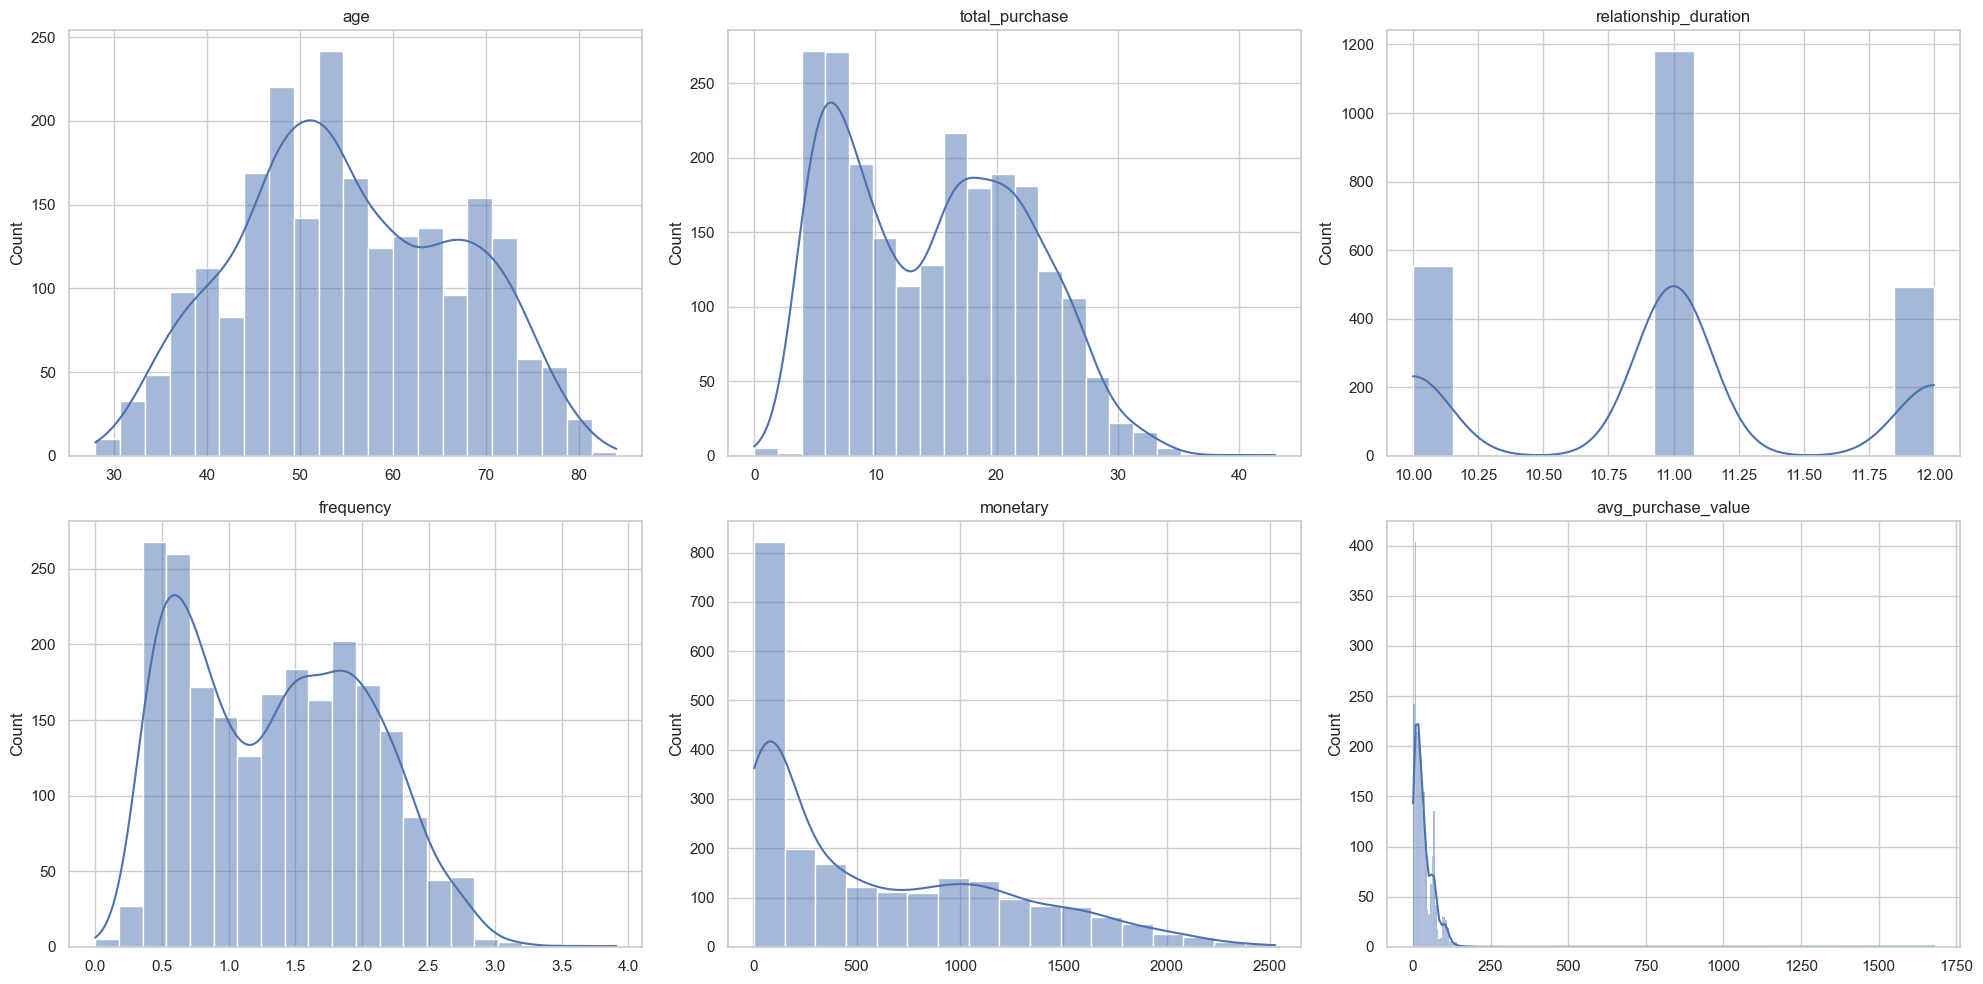

In [33]:

sns_plots(data=customer, features=exploring_new, plot_type='hist', kde=True)

- A maior parte dos nossos clientes tem entre 45 e 55 anos.
- Em total_purchase conseguimos notar 2 picos um proximo de 10 e outro 20.
- A maior parte dos nosso clientes possui até 11 anos de relacionamento com a empresa.
- Em Frequencia notamos que nosso clientes fazem de 1 uma a 2 compras por ano.
- Monetary apresenta assimetria a direita, Indicando que  a maior parte dos nosso clientes tem gastos menores e uma pequena parcela gastos altos.
- O valor médio apresenta assimetria a direita, com muitos outliers.



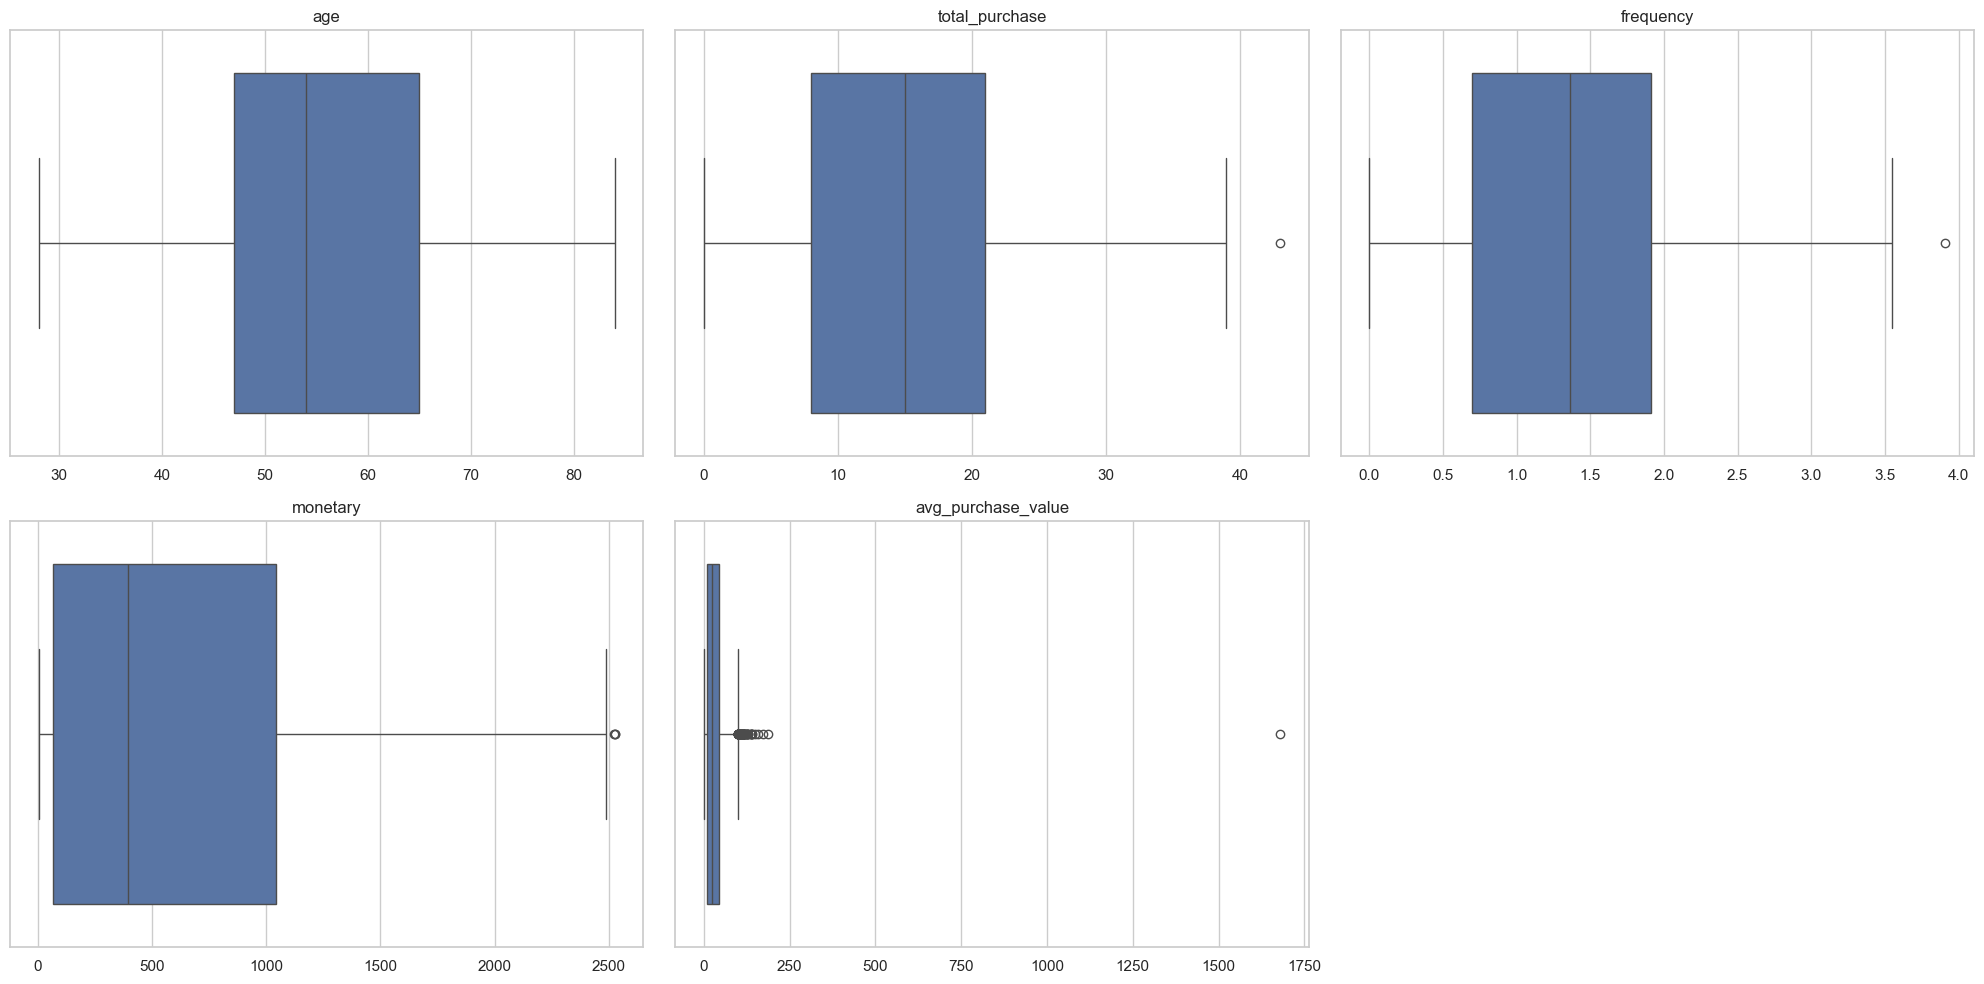

In [34]:
exploring_outliers = ['age', 'total_purchase', 'frequency', 'monetary', 'avg_purchase_value']
sns_plots(data=customer, features=exploring_outliers, plot_type='outliers')

In [35]:
customer.loc[customer['avg_purchase_value'] > 1500]

,education,marital_status,income,recency,wines,fruits,meat,fish,sweets,gold,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,dependents,age,Dt_customer,relationship_duration,monetary,total_purchase,avg_purchase_value,frequency
2228,Undergraduate,Partner,NaN,53,32,2,1607,12,4,22,0,0,0,1,0,0,46,2012-08-12,12,1679,1,1679.0,0.083333


Em vista que esse cliente aparentemente fez essa compra a um bom tempo e possivelmente não esteja mais ativo, irei removê-lo para melhor nossa análise.

In [36]:
customer.drop(customer.loc[customer['avg_purchase_value'] > 1500].index, inplace=True)

In [38]:
corr_matrix = customer.corr(numeric_only=True)

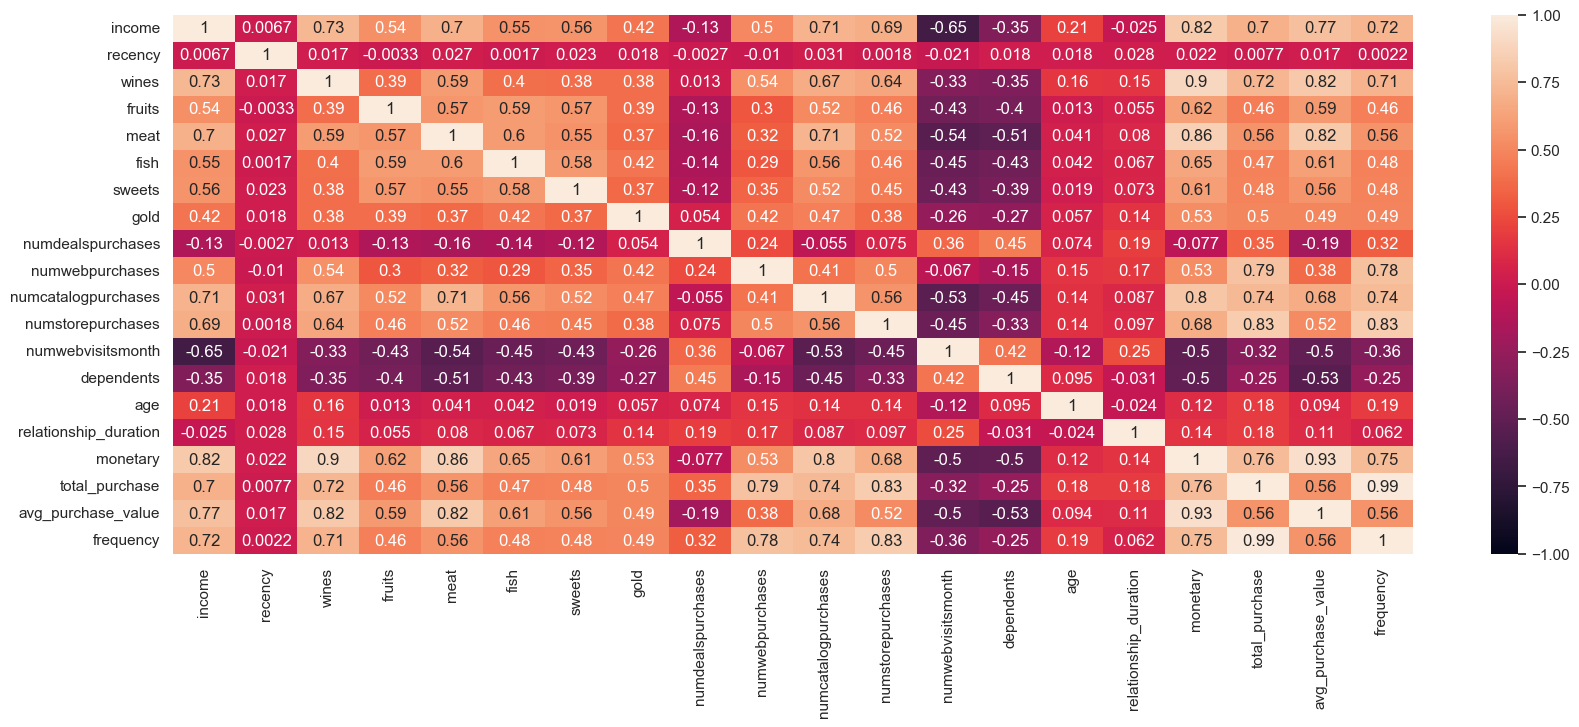

In [39]:
plt.figure(figsize=(20, 7))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True)
plt.show()

- Conseguimos notar um tipo de padrão presente nos dados, Clientes com rendas mais altas, tendem a ter frequency,monetary,total_purchase,e avg_purchase mais altos.
-  Clientes com menos filhos tendem a ser financeiramente melhores, e gastam mais dinheiro em produtos nas lojas.
-  Possivelmente não usaremos total_purchase, pois possui uma correlação muito alta com frequency o que não será util para análise.

In [41]:
customer.drop(columns=['total_purchase'], inplace=True)

In [42]:
customer.shape

(2228, 22)

In [43]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2228 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   education              object        
 1   marital_status         object        
 2   income                 float64       
 3   recency                int64         
 4   wines                  int64         
 5   fruits                 int64         
 6   meat                   int64         
 7   fish                   int64         
 8   sweets                 int64         
 9   gold                   int64         
 10  numdealspurchases      int64         
 11  numwebpurchases        int64         
 12  numcatalogpurchases    int64         
 13  numstorepurchases      int64         
 14  numwebvisitsmonth      int64         
 15  dependents             int64         
 16  age                    int64         
 17  Dt_customer            datetime64[ns]
 18  relationship_duration  int32     

## Conclusão

- Clientes com maior renda tendem a gastar mais em produtos como vinho e carne, além de preferirem compras em catálogo e lojas.
- Clientes que gastam muito em vinho também tendem a gastar bastante em carne.
- Famílias com mais filhos gastam menos em produtos premium, como vinho e carne, e têm menos compras por catálogo.
- Clientes com maior renda tendem a ter menos ou nenhum filho.
- Renda e Compras no Catálogo estão fortemente correlacionados indicando que pessoas com maior renda constumam optar por esse canal.
- Renda Possui uma correlação negativa com webvisits, mostrando que as pessoas de maior renda optam por canais como loja e catálogo.
- Notamos que familias com adolescentes tendem a comprar mais com desconto.
- Familias com crianças tendem a fazer mais visitas ao site.
- webvisits possui uma correlação negativa com quase todos os produtos oferecidos, alem de possuir uma correlação moderada com compras com desconto.
- Clientes com rendas mais altas, tendem a ter frequency,monetary,total_purchase,e avg_purchase mais altos.
- Clientes com menos filhos tendem a ser financeiramente melhores, e gastam mais dinheiro em produtos nas lojas.
- Possivelmente a empresa não está segmentando os clientes, para fazer melhores campanhas, por isso notamos um baixo numero de aceitação.
